# 1st. Binary Prediction : Titanic

The sinking of the Titanic is one of the most infamous shipwrecks in history. ON April 15, 1912 during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.

커널 접속 후 kaggle에 로그인 한다. 그 후 우측 상단의 Fork 버튼을 누르면 작업한 내용의 커널을 다운 받을 수 있다. 

- Discription : https://www.kaggle.com/c/titanic
- kernel 1 : https://www.kaggle.com/ash316/eda-to-prediction-dietanic

![Kernel fork](img/1st-001-Fork.png)

## Part0. Contents

**Part1: Exploratory Data Analysis(EDA)**
1. Analysis of the features.
1. Finding any relations or trends considering multiple features.

**Part2: Feature Engineering and Data Cleaning**
1. Adding any few features.
1. Removing redundant features.
1. Converting features into suitable form for modeling.

**Part3: Predictive Modeling**
1. Running Basic Algorithms.
1. Cross Validation.
1. Ensembling.
1. Important Features Extraction.

----

##### Youtube Titanic 001 : https://www.youtube.com/watch?v=VOjIb2TJyWg

## Part1: Exploratory Data Analysis : EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')   # 그래프의 스타일 지정

import warnings
warnings.filterwarnings('ignore')   # 오류 발생시 무시
%matplotlib inline

In [2]:
data = pd.read_csv('input/titanic/train.csv')

In [3]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


불러온 데이터에서 null 값이 있는지 체크. 
- isnull()로 null 유무를 체크한 후 sum()으로 각 칼럼별 null의 개수를 구함
- isnull().sum()은 각 칼럼별로 계산 (=sum(axis=0))
- isnull().sum(1)은 각 행별로 계산 (=sum(axis=1))

In [4]:
data.isnull().head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.isnull().sum(1).head()

0    1
1    0
2    1
3    0
4    1
dtype: int64

- the **Age, Cabin, Embarked** has null values, i will try to fix them.

### 1-1. How many Survived?

살아남은 사람들을 계산해보자.
- value_counts() : 해당 칼럼의 값과 개수를 계산



In [7]:
# font_size
sns.set(font_scale=1.2)

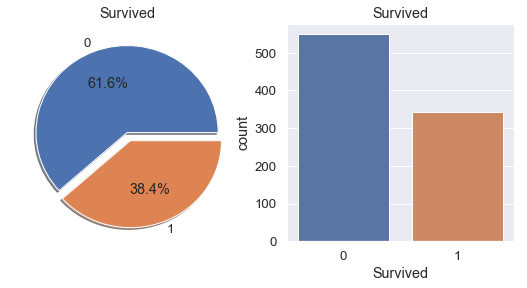

In [8]:
f,ax = plt.subplots(1,2, figsize=(8,4))  # 1행 2열의 2개의 그래프
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)  # value_counts: 값과 개수 반환
# explode는 파이그래프에서 떨어진 정도, autopct는 숫자 포멧
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

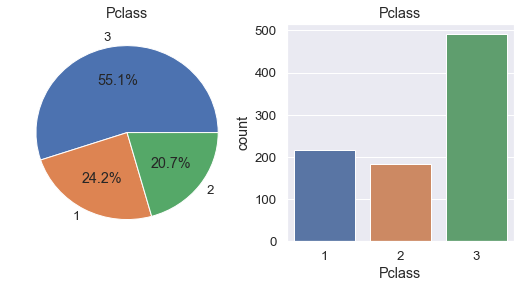

In [9]:
# 변수를 지정하는 방식
col_name = 'Pclass'
f,ax = plt.subplots(1,2, figsize=(8,4))  
data[col_name].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])  
ax[0].set_title(col_name)
ax[0].set_ylabel('')
sns.countplot(col_name, data=data, ax=ax[1])
ax[1].set_title(col_name)
plt.show()

It is evident that not many passengers survived the accident. 

Out of 891 passengers in training set, only around 350 survived i.e Only **38.4%** of the total survived the crash. We need to dig down more to get better insights from data and see which categories of the passengers did survived and whe didn't.

We will try to check the survived rarte by using the different features of the dataset. Some of the features being Sex, Port Of Emvarcation, Age, etc.

First let us understand the differenct types of features.

### 1-2. Type of Features
바로 모델링을 하는 것이 아니라 각 정보별로 분석을 해야한다. 각 칼럼들의 타입을 알아보자.

#### 1-2-1. Categorical Feature
two ot more categories and each value. Cannot sort or ordering.
- Sex, Embarked

#### 1-2-2. Ordinal Feature
relative ordering or sorting between the value.
- PClass

#### 1-2-3. Continuous Feature
take values between any two points or between the minimun or maximum value.
- Age

##### 1-2-4. Meanless Example

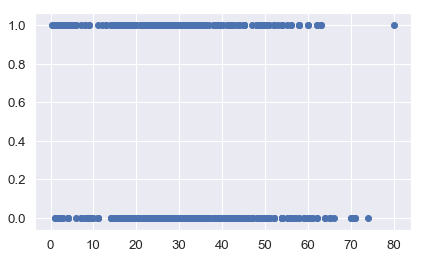

In [10]:
x_ax = data.loc[data['Age'].notnull(), 'Age']
y_ax = data.loc[data['Age'].notnull(), 'Survived']
plt.scatter(x_ax, y_ax)

나이는 연속형 변수이고, 생존여부는 카테도리 변수이다. 두 변수를 그냥 비교하는 것은 이런식으로 의미없는 그래프가 나올 뿐이다.
- 이런 scatter 그래프가 아니라 bar 그래플르 그려서 비교하는 것이 효과적

### 1-3. Analysing The Features

#### 1-3-1. Sex : Categorical Feature

groupby는 입력한 변수끼리 묶어주는 기능을 한다.
- groupby로 묶어준 데이터에서 각종 연산 가능
- count, max, mean, std, median 등

In [11]:
data.groupby(['Sex', 'Survived']).median()

PassengerId  Pclass   Age  SibSp  Parch      Fare
Sex    Survived                                                   
female 0                 420       3  24.5      1      0  15.24580
       1                 400       2  28.0      0      0  26.00000
male   0                 461       3  29.0      0      0   9.41665
       1                 508       2  28.0      0      0  26.28750

In [12]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

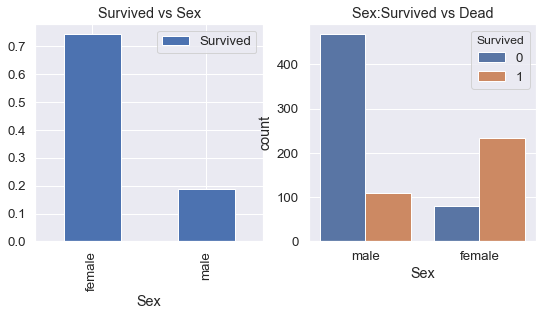

In [13]:
f,ax = plt.subplots(1,2, figsize=(8,4))
data[['Sex', 'Survived']].groupby('Sex').mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

The looks interesting. The number of men on the ship is lot more than the number of woman. Still the numver of women saved twice the number of males saved. the suvival rates for a women on the ship is around 75% while that for men in around 18~19%.

This looks to be very important feature for modeling. But is it best? Let check other features.

#### 1-3-2. Pclass : Ordinal Feature
Peaple say **Money can't buy everything.** We can clearly see the Passengers of Pclass 1 were given a very high priority while rescue. Even though the number of Passenger in Pclass 3 ware a lot higher, still the number of survival from them is very low, somewhere around **25%**

For Pclass 1 survived around **63%** while Pclass 2 is aroung **48%**, so Money anf status matters. Such a materialistic world.

Let Dive in litle bit more and check for other interesting observations. Lets check survival rate with **Sex and Pclass** Together.

In [14]:
pd.crosstab(data.Pclass, data.Survived, margins=True) \
.style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


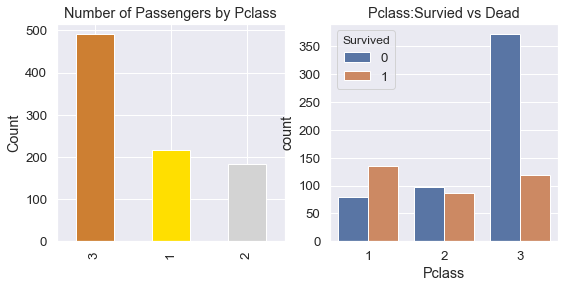

In [15]:
f, ax = plt.subplots(1,2, figsize=(8,4))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survied vs Dead')
plt.show()

##### Youtube Titanic 2 : https://www.youtube.com/watch?v=fSA89TapzdA

In [16]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True) \
.style.background_gradient(cmap='summer_r')

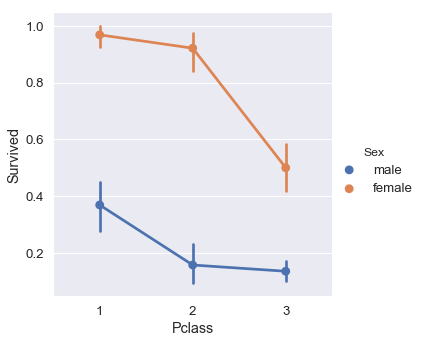

In [17]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

We use **Factorplot** in this case, because they make the separation of categorical values easy.

Looking at the **CrossTab** and the **FactorPlot**, ew can easily infer survived **Women from Pclass 1** is around **95%~96%**, as only 3 out of 94 Women from Pclass 1 died.

It is envident that irrespactive of Pclass,Women ware given first priority while rescue. Even Men from Pclass 1 have very low survival rate.

Look like Pclass is also very important feature. Lets analyse other features.

#### 1-3-3. Age : Continous Feature

나이 데이터에서 최대값과 최솟값, 그리고 평균값을 알아본다. 그리고 그래프로 그려보면 나이가 어릴수록 생존률이 올라간다는 것을 알 수 있다.

In [18]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

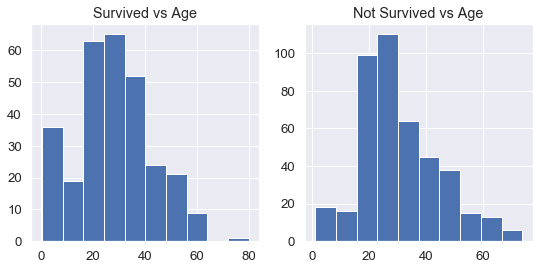

In [19]:
f, ax = plt.subplots(1,2, figsize=(8,4))
data.loc[ data.Survived==1, 'Age' ].hist(ax=ax[0])
data.loc[ data.Survived==0, 'Age' ].hist(ax=ax[1])
ax[0].set_title('Survived vs Age')
ax[1].set_title('Not Survived vs Age')
plt.show()

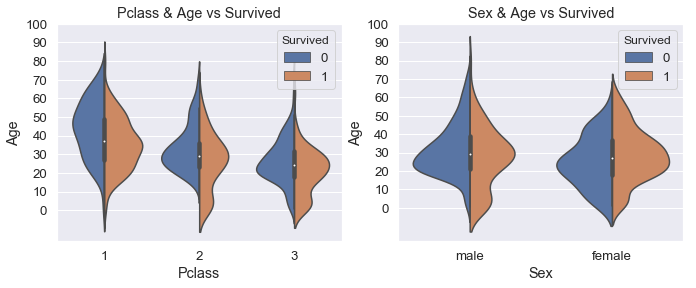

In [20]:
f,ax = plt.subplots(1,2, figsize=(10,4))
sns.violinplot('Pclass','Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass & Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot('Sex','Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex & Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

1. The number of children increases with Pclass and survical ratre for passengers below Age 10(i.e.Children) looks to be good irresprective of the Pclass.
1. Survival change for Passenegers aged 20-50 from Pclass 1  is high and is even better for Woman.
1. For males, the survival chances decreases with an increase in age.

As we had senn earlier, the Age has 177 null values. To replace these NaN values, we can assign them mean age of the dataset.

But problem is, there are many people with many different ages. We just can assign a 4 year kid with the mean age that is 29 years. Is there any way to find out what age-band doses the passenger lie??

**Bingo!** we can check the **name** feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean value of Mr and Mrs to the respective groups.

In [21]:
data['Initial']=0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')  # let extract the Saluations

Okay so here we can using the Regex: **[A-Za-z]+)..** So what it does is, it looks for strings which lie between **A-Z or a-z** and followed by **.(dot)**. So we successfully extract the initials form the Name.

In [22]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap="summer_r") # Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Okey. so there are some misspelled Initials like Mlle or Mme that stand for Miss. I will replace them with Miss and same thing for other value.

In [23]:
data['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'],\
                        ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'], inplace=True)

inplace는 수정사항을 바로 원본에 적용하는 역할을 한다. 
- **inplace=True** 없이 적용하면 변경된 사항이 적용되지 않음

In [24]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

이렇게 구한 각 존칭별 평균 나이를 빈 값에 대입한다.

#### 1-3-4. Filling NaN Ages

Assinging the NaN values with the Cell values of the mean ages.

In [25]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),    'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),   'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),  'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'), 'Age']=46

In [26]:
data.Age.isnull().any()  # So no null values left finally

False

In [27]:
data.loc[(data.Age.notnull()), :].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss


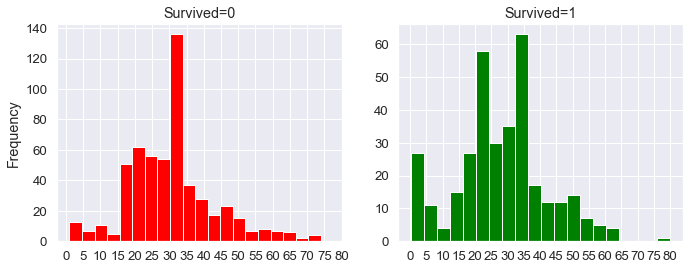

In [28]:
f, ax = plt.subplots(1,2, figsize=(10,4))
data[data.Survived==0].Age.plot.hist(ax=ax[0], bins=20, color='red')
ax[0].set_title('Survived=0')
ax[0].set_xticks(list(range(0,85,5)))
data[data.Survived==1].Age.hist(ax=ax[1], bins=20, color='green')
ax[1].set_title('Survived=1')
ax[1].set_xticks(list(range(0,85,5)))
plt.show()

1. The Toddleers(Age<5) ware saved in large numbers.(The Women and Child First Policy)
1. The oldest Passengers was saved.(80 years)
1. Maximum numbers of deaths ware in the ages group of 30~40.

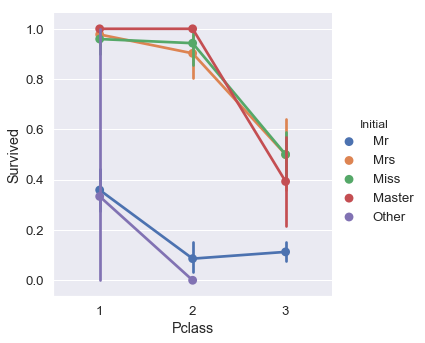

In [29]:
sns.factorplot('Pclass','Survived', hue='Initial', data=data)
plt.show()

hue 옵션을 사용하면 각 값들 별로 색상이 구분된다.

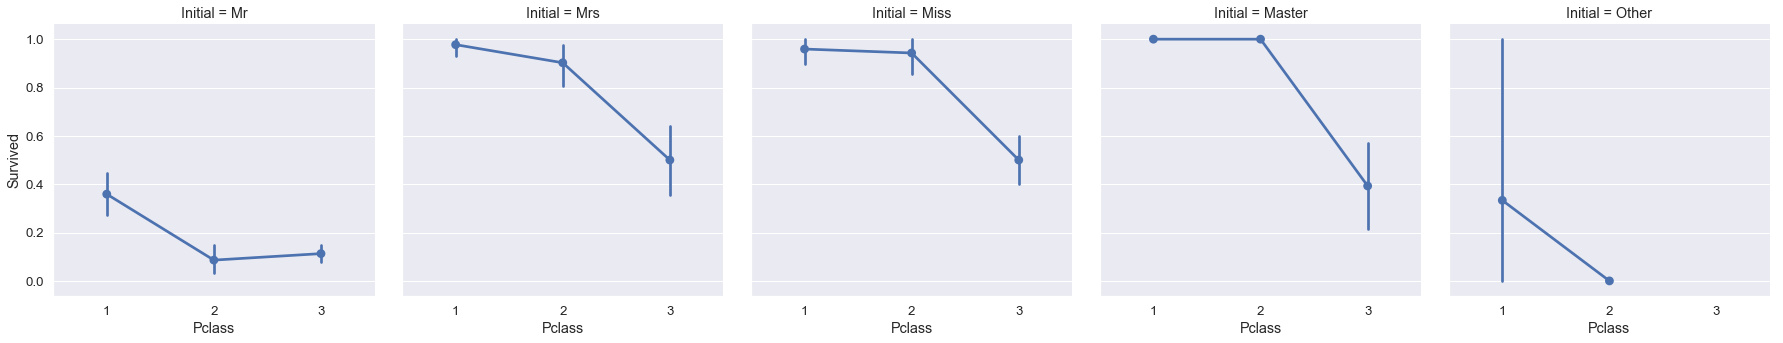

In [30]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

col 옵션을 사용하면 각 값들 별로 그래프가 나누어져 그려진다.

The Women and Child first policy thus holds true irrespective of the class.

#### 1-3-5. Embarked : Catagorical Value

Embaked는 어디어 탑승했는지는 의미한다. C,Q,S 3가지 값이 있다.

In [31]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap="summer_r")

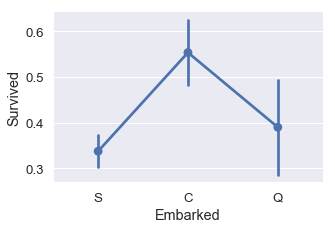

In [32]:
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

The chance for survival for Port C is highest around 0.55 while is lowest for S.

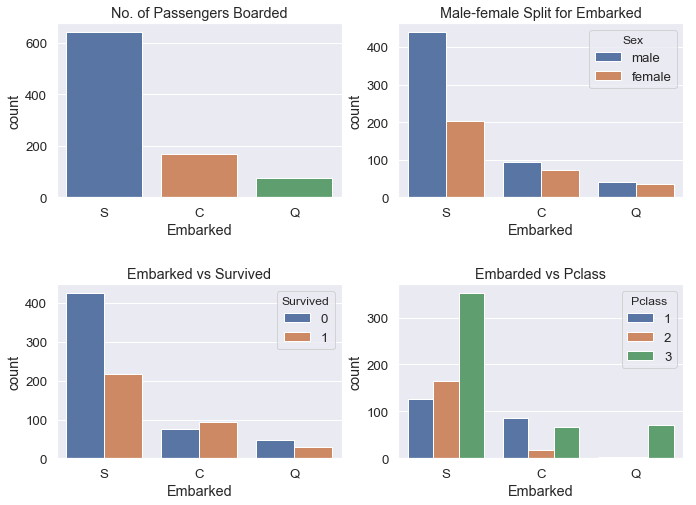

In [33]:
f,ax=plt.subplots(2,2, figsize=(10,8))
sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No. of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarded vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

1. Maximum Passengers boarded from S. Majority of them being from Pclass 3.
1. The passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of all Pclass1 and Pclass2 Passengers.
1. The Embark S loolks to the port from where majority of the rich people boarded. Stil the chances for survival is low here, that is becaouse many passengers form Plcass3 around 81% didn't survive.
1. Port Q had almost 95% of the passengers were form Pclass3.

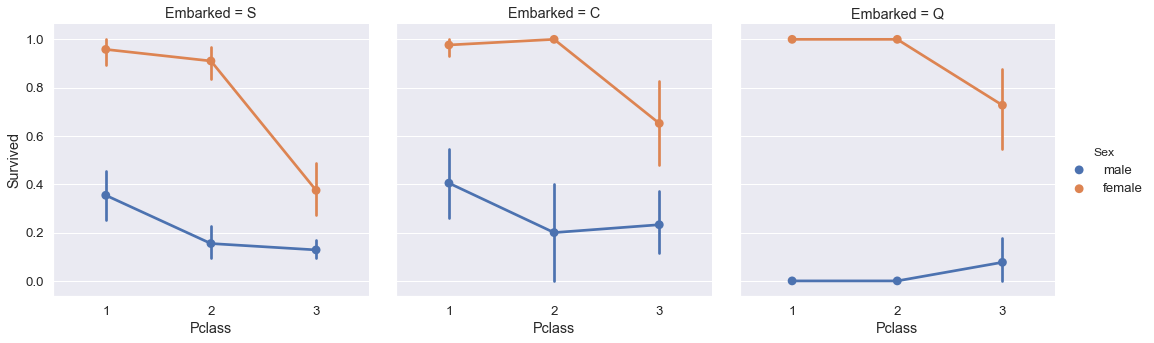

In [34]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

1. The survival chances are almost 1 for women for Pclass1 and Pclass2 irrespective of the Pclass.
1. Port S looks to be very unlocky for Pclass3 Passengers as the survival rate for both men and women is very low. **(Monry Matters)**
1. Part Q looks to be unlukiest for Men, as almost all were from Pclass3.

#### 1-3-6. Fill Embarked NaN
As we saw that maximim passengers boarded from Port S, we replace NaN with S.

In [35]:
data['Embarked'].fillna('S', inplace=True)

In [36]:
data.Embarked.isnull().any() # Finally No NaN values

False

In [37]:
data.Embarked.isnull().sum()

0

#### 1-3-7. SibSp : Discrete Feature

This feateure represents whether a person is alone or with his family members.
- Sibling = brothers, sister, stepbrohers, stepsister
- Spouse = husband, wife

In [38]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap="summer_r")

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


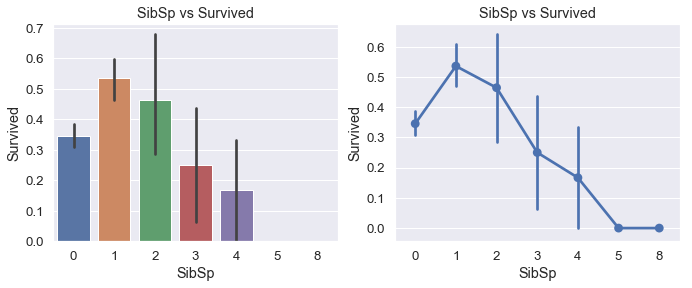

In [39]:
f,ax=plt.subplots(1,2, figsize=(10,4))
sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [40]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


the barplot and factorplot shows that if a alone onboard with no siblings, he have 34.5% survive rate. The graph roughly decreases if the number of siblings increase. This makes sense. That is, ig I have a family on board, I will try to save them instead of saving myself first. Surprisingly  the survival for families with 5-8 members is 0%. The reason may Pclass?

The reason is **Pclass**. The crosstab shows that Person SibSp>3 were all in Pclass3. It is immminent that all large famillies in Pclass3(>3) died.

#### 1-3-8. Parch

In [41]:
data.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [42]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


The crosstab assin shows that larger families ware in Pclass3.

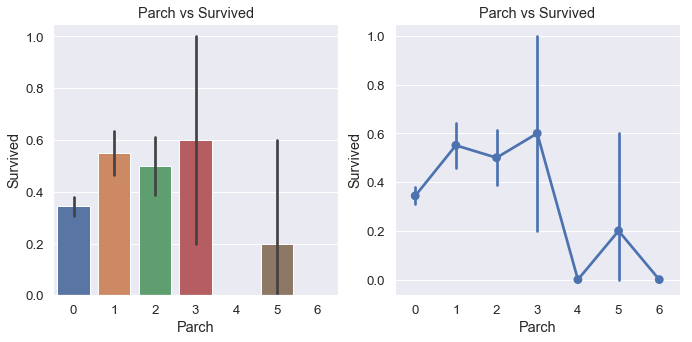

In [43]:
f, ax = plt.subplots(1,2, figsize=(10,5))
sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

Here too the results are quite similar. Passengers with their parents onboard have greater chance of suvival. It however reduces as the number goes up.

The chances of survival is good for somebody who has 1-3 parents on the ship. Being alone proves to be fatal and the chances for survival decreases when somebody has >4 parents on the ship.


In [44]:
data['new_cat_pclass_sex']=data['Pclass'].astype(str)+'_'+data['Sex'].astype(str)

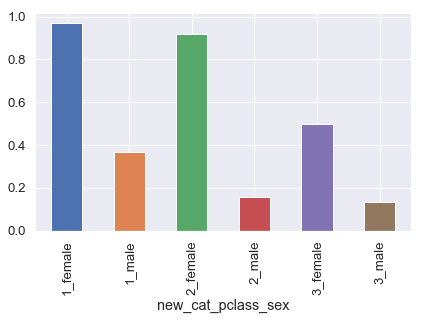

In [45]:
data.groupby('new_cat_pclass_sex')['Survived'].mean().plot.bar()
plt.show()

여기까지 작업한 내용으로 생존률의 관계를 구해보자. 
- Pclass와 sex 칼럼을 사용

In [46]:
data['new_cat_pclass_sex_embarked'] = data['Pclass'].astype(str) + '_' + data['Sex'].astype(str) + '_' + data['Embarked'].astype(str)

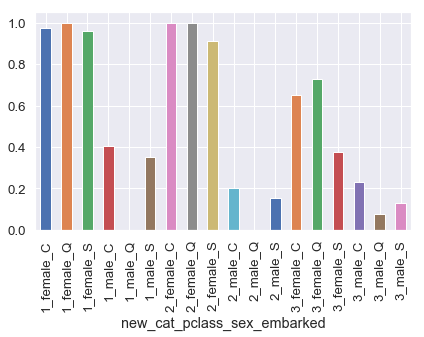

In [47]:
data.groupby('new_cat_pclass_sex_embarked')['Survived'].mean().plot.bar()

Embarked 칼럼을 추가하여 위와 동일한 과정으로 계산하였다.

#### 1-3-9. Fare : Continous Feature

In [48]:
print('Highest Fare was : ', data['Fare'].max())
print('Lowest Fare was : ', data['Fare'].min())
print('Average Fare was :', data['Fare'].mean())

Highest Fare was :  512.3292
Lowest Fare was :  0.0
Average Fare was : 32.204207968574636


The lowest fare is **0.0**. Wow! a free luxorious ride.

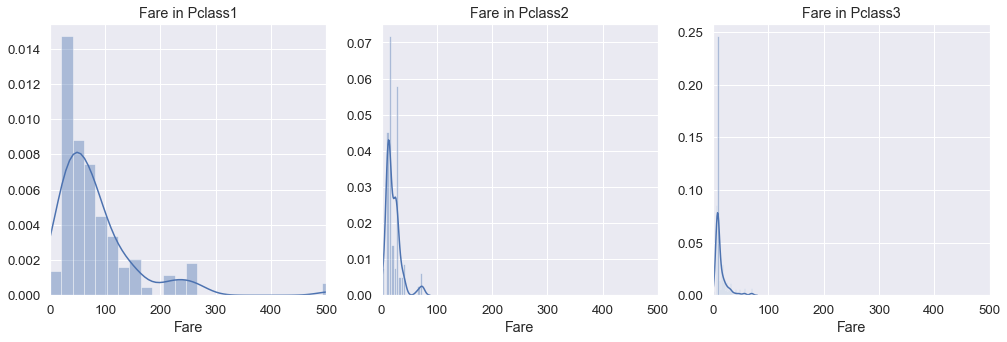

In [49]:
f,ax=plt.subplots(1,3, figsize=(15,5))
for i in range(3):
    sns.distplot(data[data.Pclass==i+1].Fare, ax=ax[i])
    ax[i].set_title('Fare in Pclass'+str(i+1))
    ax[i].set_xlim([0,500])
plt.show()

There looks to be large distribution in the fares of Passengers in Pclass1 and this distribution gose on decreasing as the standards reduces. As this is also continuous, we can convert into discrete values by binning.

##### Youtube Titanic 004 : https://goo.gl/wr2Dhs

### 1-4. Observation in a Nutshell for features

- **sex** : The Chance of survival for women is high as compared to men.


- **Pclass** : There is a visible trend that being **1st class passenger** give you better chance of survival. The survival rate for **Pclass3 is very low.** For **Women**, the chance of survival from Pclass1 is almost 1 and is high too for those from **Pclass2. Money Wins!!!**


- **Age** : Children less than 5-10 years do have high chance of survival. Passengers between age group 15 to 35 died a lot.


- **Embarked** : This is very interesting feature. **The chance of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S**. Passengers at Q were all from Pclass3.


- **Parch + SibSp** : Having 1-2 siblings, spouse on board or 1-3 Parents shows a greater chance of probability rather then being alone or having a large family travelling with you.


### 1-5. Coreelation Betwwen The Features

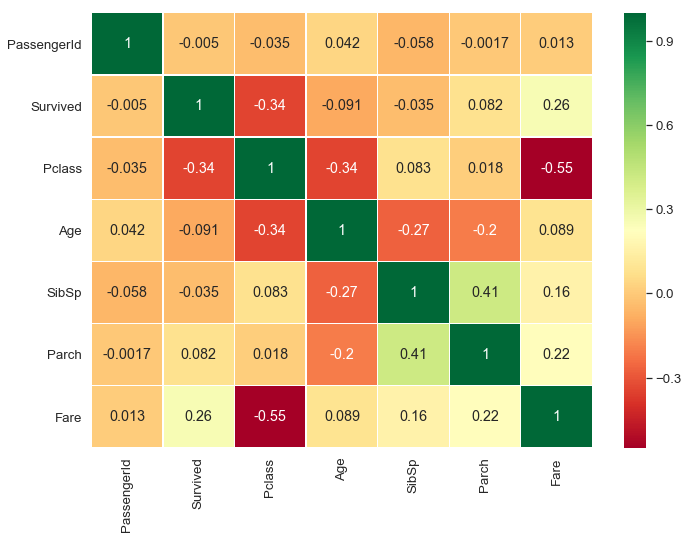

In [50]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

The first thing to note that only numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. Before understanding the plot, let us see what exactly correlation is.

1. **POSITIVE CORRELATION**<br>
if an increase feature A leads to increase in feature B, then they are positive correlated. A value 1 means perfect positive correlation.
<br><br>
1. **NEGATIVE CORRELATION**<br>
if an increase in feature A leads to decrease in feature B, Then they are negatively correlated. A value -1 means perfect negative correlation.


Now let say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as **MultiColinearity** as both of them contains almost the same information.

So do you think we should use both them as **one of them is redundant.** While making or training models, we should try to eliminate redundant features as it reduce training time and many such advantages.

Now from the above heatmap,we can see that the features are not much correlated. The highest correlation is between **SibSp and Parch i.e 0.41**. So we can carry on with features.

----

## Part2: Feature Engineering and Data Cleaning

Now what is Feature Engineering?

Whenever we are given data-set with features, it is not necessary that all the features will be important. there maybe be many redundant features which should eliminated. Also we can get or add new features by observing or extracting information from other features.

An example would be getting the Initials features using the Name Feature. Lets see if we can get any new features and eliminate a few. Also we will train from the existing relevant features to suitable from for Predictive Modeling.

### 2-1. Age_band

As I have mentioned earlier that Age is a continuous feature. there is a problem with Continuous Variables in Machine Learning Models.

**Eg**: If I say to group or arrange Sports Person by Sex, We can easily segregate them by male and female.

Now if I say to group them by their **Age**, then how would you do it? If there are 30 Persons , there may be 30 age values. Now this is problematic.

We need to convert these continuous vales into categorical values by either Binning or Normalization. I will be using binning i.e group a range of ages into a single bin or assign them a single value.

Okay so the maximum age of passenger was 80. So lets divide the range from 0-80 into 5 bins. So 80/5=16. So bins size 16.

In [51]:
data['Age_band']=0
j = 1
for i in range(16,65,16):
    data.loc[(data['Age']>i)&(data['Age']<=i+16), 'Age_band' ] = j
    j = j+1
data.loc[data['Age']<=16, 'Age_band']=0
data.loc[data['Age']>64, 'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,new_cat_pclass_sex,new_cat_pclass_sex_embarked,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,3_male,3_male_S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1_female,1_female_C,2


In [52]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,Age_band
1,382
2,325
0,104
3,69
4,11


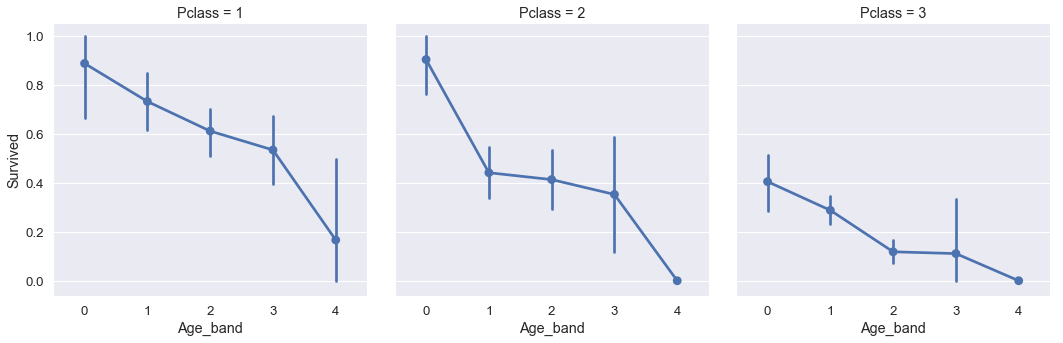

In [53]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

True that... the survival rate decreases as the age increases irrespective of the Pclass.

### 2-2. Family_Size and Alone

At this point, we can create a new feature called "Family_Size" and "Alone" and analysis it. This feature is the summation of Parch and SibSp. It gives us a combined data so that we can check if survival rate have anything to do with family size of the passengers. Alone will denote whether a passenger is alone or not.

In [54]:
data['Family_Size']=0
data['Alone']=0
data['Family_Size']=data['Parch']+data['SibSp']
data.loc[data.Family_Size==0, 'Alone']=1

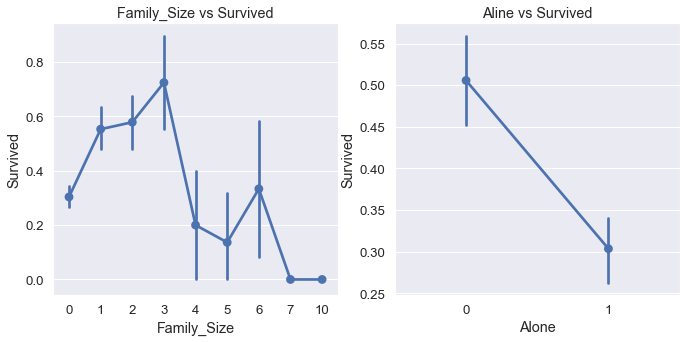

In [55]:
f,ax = plt.subplots(1,2, figsize=(10,5))
sns.factorplot('Family_Size', 'Survived', data=data, ax=ax[0])
sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
ax[0].set_title('Family_Size vs Survived')
ax[1].set_title('Aline vs Survived')
plt.close(2)
plt.close(3)

**Family_Size=0 means that the passenger is alone.** Clearly, if you are alone or family_size=0, then chances for survival is very low. For family_size>4, the chances decreases too. This also looks to be an important feature for the model. Lets examine this further.

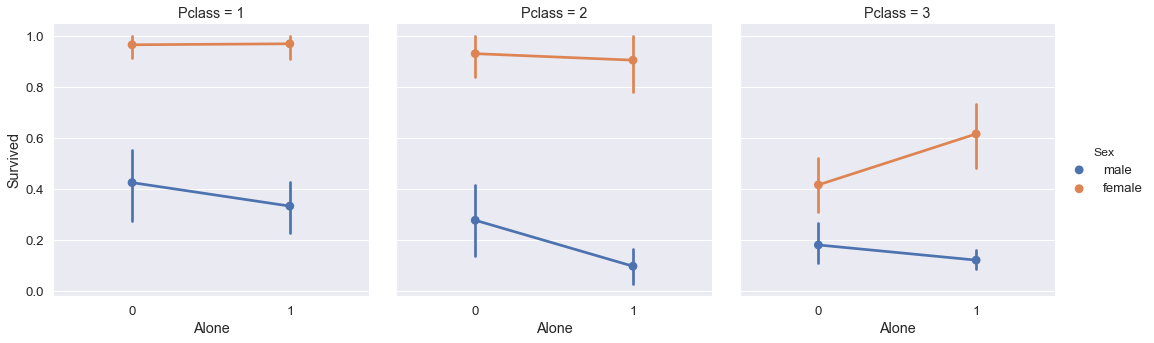

In [56]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')
plt.show()

except for Pclass3 where the chances of females who are alone is high than those with family.

### 2-3. Fare_Range

Since fare is also a continuous feature, we need to convert it into ordinal value. For this we will use **pasndas.qcut.**

So what **qcut** does is it splits or arranges he values according the number of bins we has passed. So if we pass for 5 bins, it will arranges the values equally spaced into 5 separate bins or value ranges.

In [57]:
data['Fare_Range'] = pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [58]:
data['Fare_Range'].value_counts()

(7.91, 14.454]     224
(-0.001, 7.91]     223
(31.0, 512.329]    222
(14.454, 31.0]     222
Name: Fare_Range, dtype: int64

As discussed above, we can clearly see that as the **fare_range increases the chances of survival increases.**

Now we cannot the Fare_Range values as it is. We should convert it into singleton values same as we did in **Age_band**

In [59]:
j = 0
data['Fare_cat']=0
for i in data['Fare_Range'].drop_duplicates().sort_values():
    data.loc[ (data['Fare']>i.left) & (data['Fare']<=i.right) , 'Fare_cat' ] = j
    j = j+1

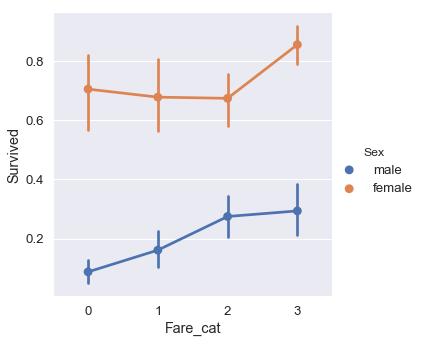

In [60]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

clearly, as the Fare_cur increases, the survival chances increases. This feature may become an important feature during along with the Sex.

### 2-4. Converting String values into Numeric

Since we cannot strings to a machine learning model, we need to convert features like Sex, Embarked, etc into numeric values. 

In [61]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2], inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4], inplace=True)

### 2-5. Dropping UnNeed Features

- **Name** : We don'y need name feature as it cannot converted into any categorical value.
- **Age** : We have Age_band feature, so no need of this.
- **Ticket** : It is any random string that cannot be categorized.
- **Fare** : we have Fare_cat feature. so unneeded.
- **Cabin** : A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.
- **Fare_Range** : We have the fare_cat feature.
- **PassengerId** : Cannot be categorized.

In [62]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'], axis=1, inplace=True)

In [63]:
data.drop(['new_cat_pclass_sex', 'new_cat_pclass_sex_embarked'], axis=1, inplace=True)

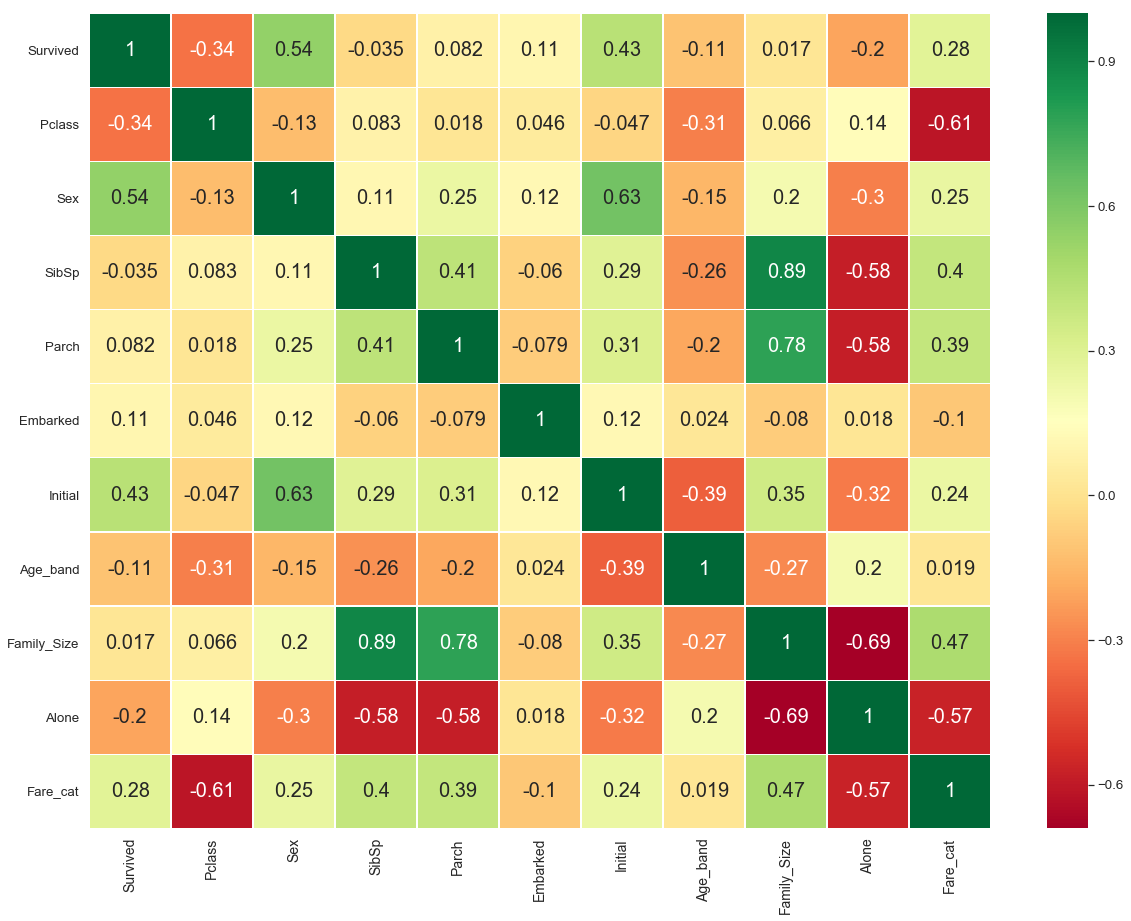

In [64]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()

Now the above correlation plot, we can see some positively related features. Some of them being **SibSp and Family_Size** and **Parch and Family_Size** and some negative ones like **Alone and Family_Size.**

----

##### Youtube Titanic 005 : https://goo.gl/VpCw7b

# Part3: Predictive Modeling

We have gained some insights from EDA part. But with that, we cannot accurately predict or tell whether a passenger will survive or die. 
So now we will predict the whether the Passenger will survive or not using some great Classification Algorithms. Following are the algorithms I will use to make the model.

1. Logistic Regressing
1. Support Vector Machines (Linear and radial)
1. Random Forest
1. K-Nearest Neighbors
1. Naive Bayes
1. Decision Tree
1. Logistic Regression


### 3-1. Runing Basic Algoritms

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [66]:
train,test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

#### 3-1-1. Radial Support Vector Machine(rbt-SVM)

In [67]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1, probability=True)
model.fit(train_X, train_Y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

- probability 는 확률을 구하는 옵션

In [68]:
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is ', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is  0.835820895522388


- 위에서 훈련시 probilibility=True 를 설정했다면 predict_proba()로 생존확률을 구할 수 있음.
- 아님 probability=False나 기본값으로 설정했다면 0, 1식으로 생존여부만 나옴.

In [69]:
# 생존확률이 50% 이상것만 계산
prediction1 = (model.predict_proba(test_X)[:, 1] > 0.2).astype(int)
print('Accuracy for rbf SVM is ', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is  0.8171641791044776


In [70]:
# 변수로 생존확률을 지정
threshold = 0.1
prediction1 = (model.predict_proba(test_X)[:, 1] > threshold).astype(int)
print("Accurancy for rbf SVM is ", metrics.accuracy_score(prediction1, test_Y))

Accurancy for rbf SVM is  0.3843283582089552


In [71]:
for threshold in range(1,11):
    prediction_loop = (model.predict_proba(test_X)[:, 1] > threshold/10).astype(int)
    print(threshold/10, "Accurancy for rbf SVM is ", metrics.accuracy_score(prediction_loop, test_Y))

0.1 Accurancy for rbf SVM is  0.3843283582089552
0.2 Accurancy for rbf SVM is  0.8171641791044776
0.3 Accurancy for rbf SVM is  0.8283582089552238
0.4 Accurancy for rbf SVM is  0.8283582089552238
0.5 Accurancy for rbf SVM is  0.8283582089552238
0.6 Accurancy for rbf SVM is  0.8283582089552238
0.7 Accurancy for rbf SVM is  0.8059701492537313
0.8 Accurancy for rbf SVM is  0.7873134328358209
0.9 Accurancy for rbf SVM is  0.6231343283582089
1.0 Accurancy for rbf SVM is  0.6156716417910447


In [72]:
# 더 세부적으로 표시
score_array = []
for threshold in np.arange(0, 1, 0.01):
    prediction_loop = (model.predict_proba(test_X)[:, 1] > threshold).astype(int)
    score = 100 + metrics.accuracy_score(prediction_loop, test_Y)
    # print(threshold, "Accurancy for rbf SVM is ", score)
    score_array.append(score)

Text(0,0.5,'accurancy score')

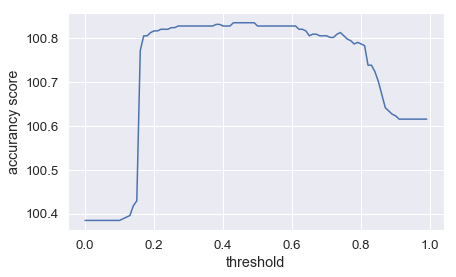

In [73]:
plt.plot(np.arange(0,1,0.01), score_array)
plt.xlabel('threshold')
plt.ylabel('accurancy score')

In [74]:
# 가장 높은 확률은?
np.argmax(score_array)

43

- 생존률 43로 계산했을 때 가장 높다.

### 3-1-2. Linear Support Vector Machine(linear-SVM)

In [75]:
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accurancy for linear SVM is ', metrics.accuracy_score(prediction2, test_Y))

Accurancy for linear SVM is  0.8171641791044776


### 3-1-3. Logistic Regression

In [76]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('Accurancy of the Logistic Regression is ', metrics.accuracy_score(prediction3, test_Y))

Accurancy of the Logistic Regression is  0.8171641791044776


### 3-1-4. Decision Tree

In [77]:
model=DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('Accurancy of Decision Tree is ', metrics.accuracy_score(prediction4, test_Y))

Accurancy of Decision Tree is  0.8022388059701493


### 3-1-5. K-Nearnest Neighbors(KNN)

In [78]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('Accurancy of the KNN is ', metrics.accuracy_score(prediction5, test_Y))

Accurancy of the KNN is  0.8283582089552238


Now the accuracy for the KNN model changes as we change the values for  n_neighbors attribute. The default values is 5. Lets check the accuracies over various values of n_neighbors.

In [79]:
a_index=list(range(1,11))
a = pd.Series()
x= range(0,11)
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))

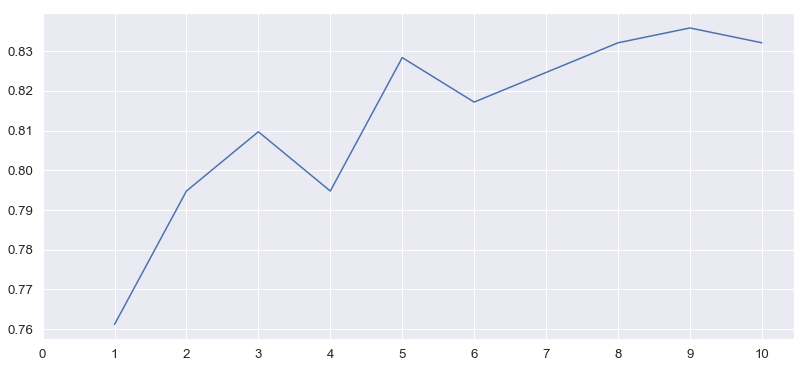

Accuracy for differenct values of a n are  [0.76119403 0.79477612 0.80970149 0.79477612 0.82835821 0.81716418
 0.82462687 0.83208955 0.8358209  0.83208955] with the max value as  0.835820895522388


In [80]:
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracy for differenct values of a n are ', a.values, 'with the max value as ', a.values.max())

### 3-1-6. Gaussian Naive Bayes

In [81]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('Accuracy of the Navie Bayes is ', metrics.accuracy_score(prediction6, test_Y))

Accuracy of the Navie Bayes is  0.8134328358208955


### 3-1-7. Random Forest

유명한 분석 방법으로 아상블과 비슷하다.

In [82]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('Accuracy of Random Forest is ', metrics.accuracy_score(prediction7, test_Y))

Accuracy of Random Forest is  0.8246268656716418


The accuracy of a model is not the only factor that determines of the classifier. Let's say that classifier is trained over a training data and tested over the test data and it scores an accuracy of 90%.

Now the seems to be very good accuracy for a classifier, but can we confirm that it will be 90% for all new test sets that come over??. The answer is **No**, because we can't determine which all instances well the classifier will use to train itself. As the training and testing data changes, the accuracy will also change. It may increase or decrease. This is known as **model variance.**

To overcome this and get a generalized model, we suer **Cross Validation**



### 3-2. Cross Validation

Many a times the data is imbalanced, i.e there may be number of class1 instances but less number of other class instances. Thus we should train and test our algorithm on each and every instance of the dataset. Then we can take an average of all the noted accuracies over the dataset.

1. The K-Fold Cross Validation works by first dividing the dataset into k-subsets.
<br><br>
1. Let's say we divide the dataset into (k=5) parts. We reserve 1 part for testing and train the algorithm over the 4 parts.
<br><br>
1. We continue the process by changing the testing part in each iteration and training the algorithm over the other parts. The accuracies and errors are then averaged to get a average accuracy of the algorithm. 
<br><br>
1. An algorithm may underfit over a dataset for some training data and sometimes also overfit the data for other training set. Thus with cross-validation, we can achieve a generalized model.



In [83]:
from sklearn.model_selection import KFold # for K-fold cross validation
from sklearn.model_selection import cross_val_score # score evaluation
from sklearn.model_selection import cross_val_predict # prediction

kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz = []
accuracy = []
std = []
classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Reggrssion', 'KNN', 'Desision Tree', 'Navie Bates', 'Random Forest']
models = [svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(), \
          KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(), \
         GaussianNB(), RandomForestClassifier(n_estimators=100)]

In [84]:
kfold

KFold(n_splits=10, random_state=22, shuffle=False)

In [85]:
for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

In [86]:
new_models_dataframe2 = pd.DataFrame({'CV Mean':xyz, 'Std':std}, index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.791223,0.045646
Radial Svm,0.828290,0.034427
Logistic Reggrssion,0.804719,0.025670
KNN,0.812659,0.041477
Desision Tree,0.809251,0.031417
Navie Bates,0.799139,0.028757
Random Forest,0.818215,0.035256


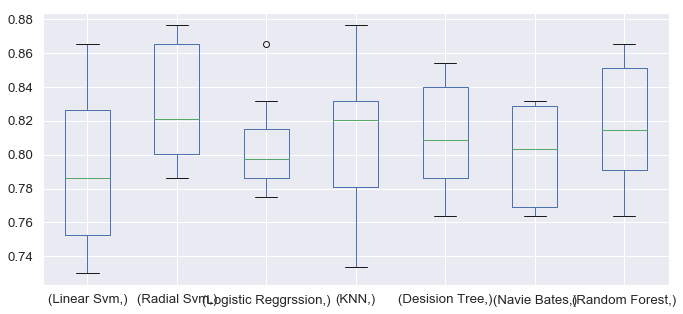

In [87]:
plt.subplots(figsize=(10,5))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

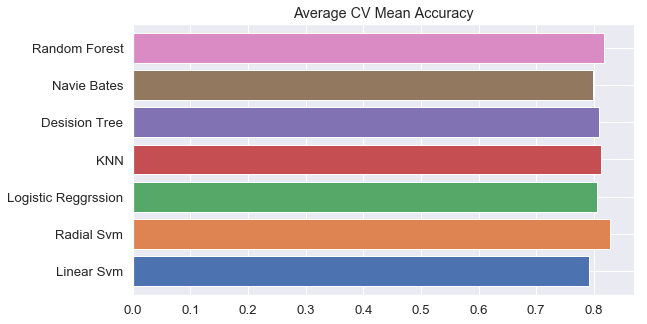

In [88]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
plt.gcf().set_size_inches(8,5)
plt.show()

The classification accuracy can be sometimes misleading due to imbalance. we can get summarized result with the help of confusion matrix, which shows where did the model go wrong, or which class did the model predict wrong.

### 3-3. Confusion Matrix

It gives the numbers of correct and incorrect classifications made by the classifier.

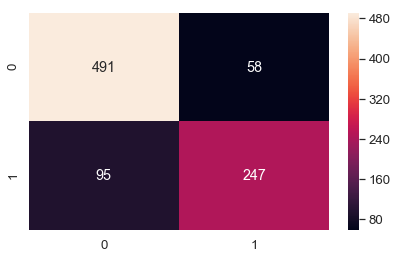

In [89]:
y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X,Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), annot=True, fmt='2.0f')
plt.show()

- y축이 실제값, x축이 예상값

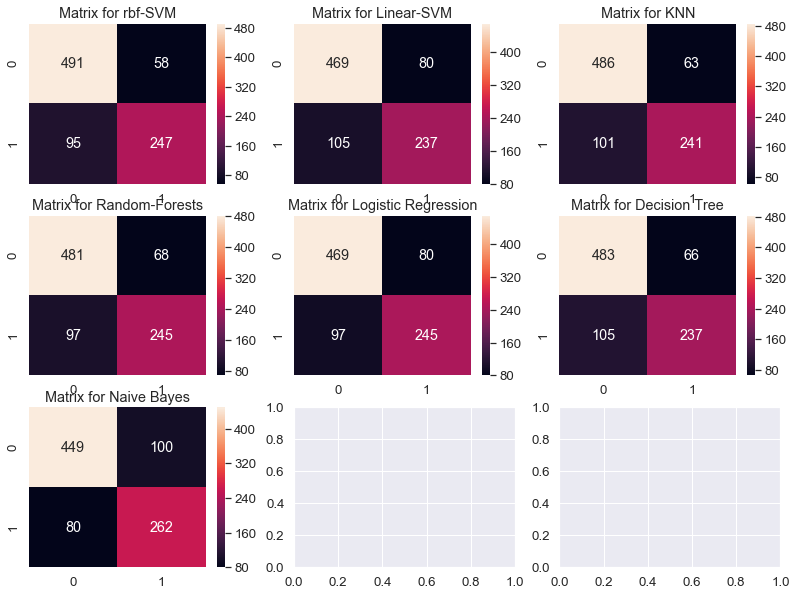

In [90]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

The left diagonal shows the number of correct predictions made for each class while the right diagonal shows the number of wrong prediction made. Lets consider the first plot for rbf-SVM:

1. The no. of correct predictions are **491(for dead) + 247(for survived)** with the mean CV accuracy being **(491+247)/891 = 82.8%** which we did get earlier.

1. **Errors** -> Wrongly Classified 58 dead people as survived and 95 survived as dead. Thus it has made more mistakes by predicting dead as survived.

By looking at all the matrices, we can say that rbt-SVM has a higher chance in correctly predicting dead passengers but NaiveBayes has a higher chance in correctly predicting passengers who survived.

##### Youtube Titanic 006 : https://goo.gl/9K6jZB

### 3-4 Hyper-Parameters Tuning

The machine learning models are like a Black-Box. There are some default parameter values for this Black-Box, which we can tune or change to get a better model. Like the C and gamma in the SVM model and similarly different parameters for different classifiers, are called the hyper-parameters, which we can tune to change the learning rate of the algorithm and get a better model. This known as Hyper-Parameter Tuning.

We will tune the hyper-parameters for the 2 best classifiers i.e the SVM and Random Forests.

#### 3-4-1. SVM

In [94]:
from sklearn.model_selection import GridSearchCV

C=[0.05, 0.1, 0.2, 0.3, 0.25 , 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [91]:
kernel=['rbf', 'linear']
hyper={'kernel':kernel, 'C':C, 'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8282828282828283
SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:    9.4s finished


#### 3-4-2. Random Forest

In [93]:
n_estimators = range(100, 1000, 100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   13.8s finished


0.8181818181818182
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


The best score for Rbf-Svm is **82.82%** **with C=0.05 and gamma=0.1** For RandomForest, score is abt **81.8% with n_estimators=800**.

----

----

----

# Ensembling

Ensembling is a good way to increase the accuracy or performance of a model. In simple words, it is the combination of various simple models to create a single powerful model.

Lets say we want to buy a phone and ask many people about it based on various parameters. So then we can make a strong judgement about a single product after analysing all different parameters. This is **Ensembling**, which improves the stability of the model. Ensembling can be done in ways like:

1)Voting Classifier

2)Bagging

3)Boosting.

## Voting Classifier

It is the simplest way of combining predictions from many different simple machine learning models. It gives an average prediction result based on the prediction of all the submodels. The submodels or the basemodels are all of diiferent types.

In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

## Bagging

Bagging is a general ensemble method. It works by applying similar classifiers on small partitions of the dataset and then taking the average of all the predictions. Due to the averaging,there is reduction in variance. Unlike Voting Classifier, Bagging makes use of similar classifiers.

#### Bagged KNN

Bagging works best with models with high variance. An example for this can be Decision Tree or Random Forests. We can use KNN with small value of **n_neighbours**, as small value of n_neighbours.

In [ ]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

#### Bagged DecisionTree


In [ ]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

## Boosting

Boosting is an ensembling technique which uses sequential learning of classifiers. It is a step by step enhancement of a weak model.Boosting works as follows:

A model is first trained on the complete dataset. Now the model will get some instances right while some wrong. Now in the next iteration, the learner will focus more on the wrongly predicted instances or give more weight to it. Thus it will try to predict the wrong instance correctly. Now this iterative process continous, and new classifers are added to the model until the limit is reached on the accuracy.

#### AdaBoost(Adaptive Boosting)

The weak learner or estimator in this case is a Decsion Tree.  But we can change the dafault base_estimator to any algorithm of our choice.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

#### Stochastic Gradient Boosting

Here too the weak learner is a Decision Tree.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

#### XGBoost

In [ ]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

We got the highest accuracy for AdaBoost. We will try to increase it with Hyper-Parameter Tuning

#### Hyper-Parameter Tuning for AdaBoost

In [ ]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

The maximum accuracy we can get with AdaBoost is **83.16% with n_estimators=200 and learning_rate=0.05**

### Confusion Matrix for the Best Model

In [ ]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

## Feature Importance

In [ ]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

We can see the important features for various classifiers like RandomForests, AdaBoost,etc.

#### Observations:

1)Some of the common important features are Initial,Fare_cat,Pclass,Family_Size.

2)The Sex feature doesn't seem to give any importance, which is shocking as we had seen earlier that Sex combined with Pclass was giving a very good differentiating factor. Sex looks to be important only in RandomForests.

However, we can see the feature Initial, which is at the top in many classifiers.We had already seen the positive correlation between Sex and Initial, so they both refer to the gender.

3)Similarly the Pclass and Fare_cat refer to the status of the passengers and Family_Size with Alone,Parch and SibSp.

I hope all of you did gain some insights to Machine Learning. Some other great notebooks for Machine Learning are:
1) For R:[Divide and Conquer by Oscar Takeshita](https://www.kaggle.com/pliptor/divide-and-conquer-0-82297/notebook)

2)For Python:[Pytanic by Heads and Tails](https://www.kaggle.com/headsortails/pytanic)

3)For Python:[Introduction to Ensembling/Stacking by Anisotropic](https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python)

### Thanks a lot for having a look at this notebook. If you found this notebook useful, **Do Upvote**.
